# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#IMPORT LIBRARY

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# import dataset

# Membaca data hasil clustering
df = pd.read_csv('segmented_customers.csv')

In [3]:
# # INFO STRUKTUR DATA

# Menampilkan informasi tentang struktur dataset
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          916 non-null    object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases    

In [4]:
# Menampilkan statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif Numerikal:")
display(df.describe())

Statistik Deskriptif Numerikal:


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Children,Total_Spending,Tenure_Days,Cluster
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,916.000000,2240.000000
mean,1968.805804,51865.874554,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,0.072768,0.064286,0.013393,0.009375,0.149107,56.147768,0.950446,605.779408,522.766376,1.434821
std,11.984069,20936.104821,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,0.259813,0.245316,0.114976,0.096391,0.356274,11.771725,0.751803,602.189559,269.524649,1.035434
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,5.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000,68.750000,361.000000,1.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.000000,396.000000,522.500000,1.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,1.000000,1045.500000,699.250000,2.000000
max,1996.000000,117416.250000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,2510.625000,1063.000000,3.000000


In [5]:
# Menampilkan nama kolom
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_Children',
       'Total_Spending', 'Favorite_Category', 'Tenure_Days', 'Cluster',
       'Segment'],
      dtype='object')

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
# SPLITTING

# Pisahkan fitur dan target
X = df.drop(['Segment', 'Cluster', 'Dt_Customer'], axis=1) 
y = df['Segment']

In [7]:
# Definisikan kolom numerik & kategorikal
numerical_features = ['Income', 'Recency', 'Age', 'Total_Spending']
categorical_features = ['Education', 'Marital_Status', 'Favorite_Category']

In [8]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'  # Drop kolom lain yang tidak relevan
)

In [9]:
# Membagi data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Bangun pipeline: preprocessing + model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [11]:
# MODELLING

# Latih model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Income', 'Recency', 'Age',
                                                   'Total_Spending']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Education',
                                                   'Marital_Status',
                                                   'Favorite_Category'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [12]:
# PREDICTION

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.96875

Classification Report:
                                                               precision    recall  f1-score   support

Active Middle-Aged (Moderate Income, Frequent Online Buyers)       0.99      0.96      0.97        91
       Affluent Shoppers (High Income, Wine Lovers, Married)       0.96      0.99      0.98       123
         Budget Young Families (Low Income, Kids, Groceries)       0.95      0.95      0.95        98
            Inactive Seniors (Low Spending, Retired, Single)       0.98      0.97      0.97       136

                                                    accuracy                           0.97       448
                                                   macro avg       0.97      0.97      0.97       448
                                                weighted avg       0.97      0.97      0.97       448



In [13]:
# Evaluasi model pada data latih dan uji
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Akurasi Data Latih: {train_accuracy}")
print(f"Akurasi Data Uji: {test_accuracy}")

# Jika akurasi data latih jauh lebih tinggi dari data uji, kemungkinan overfitting
# Jika kedua akurasi rendah, kemungkinan underfitting

Akurasi Data Latih: 1.0
Akurasi Data Uji: 0.96875


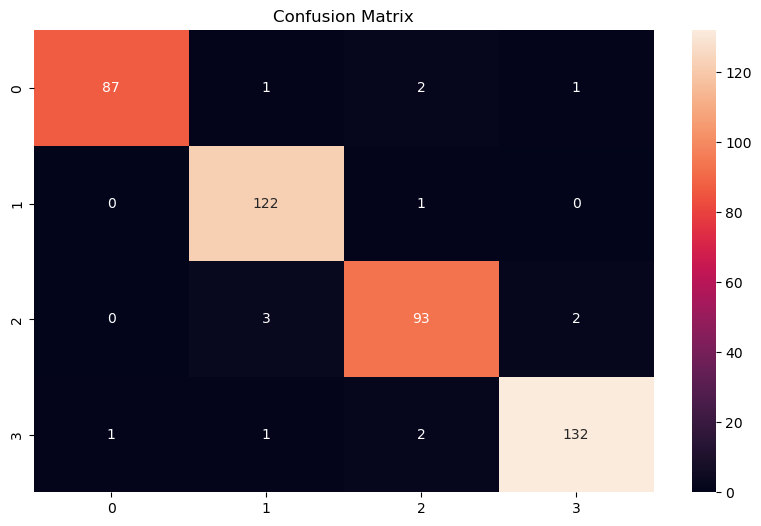

In [14]:
# Confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

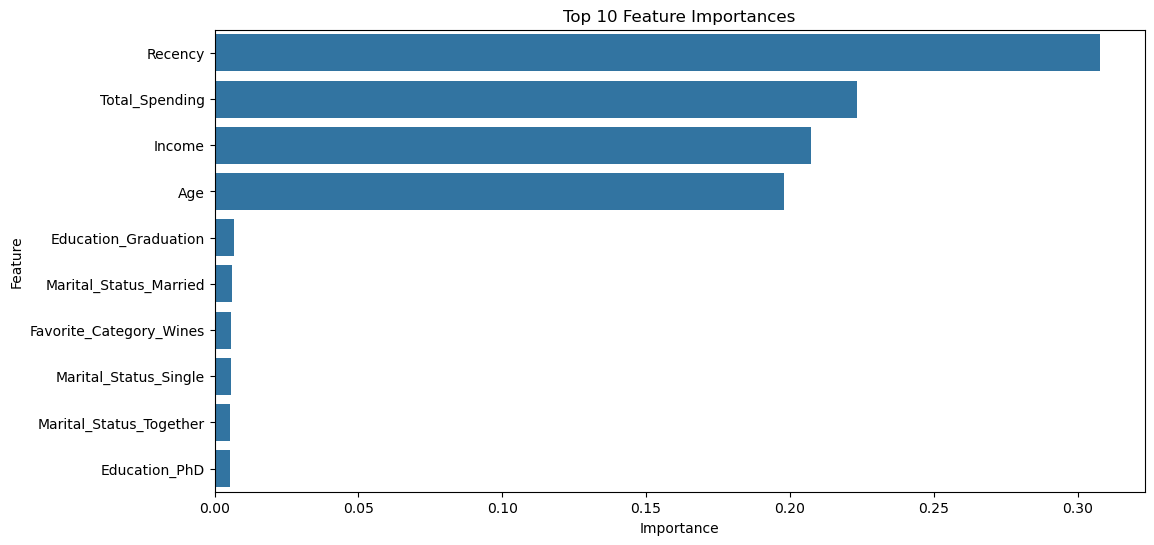

In [15]:
# Feature importance
feature_importances = model.named_steps['classifier'].feature_importances_
features = numerical_features + model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out().tolist()
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [16]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [17]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).

Accuracy: Nilai akurasi 0.96875 menunjukkan bahwa model Anda bekerja sangat baik pada data uji.

Classification Report: Nilai precision, recall, dan f1-score cukup tinggi untuk semua kelas, dengan sedikit perbedaan antara kelas. 

Classification Report:
                                                               precision    recall  f1-score   support

Active Middle-Aged (Moderate Income, Frequent Online Buyers)       0.99      0.96      0.97        91
       Affluent Shoppers (High Income, Wine Lovers, Married)       0.96      0.99      0.98       123
         Budget Young Families (Low Income, Kids, Groceries)       0.95      0.95      0.95        98
            Inactive Seniors (Low Spending, Retired, Single)       0.98      0.97      0.97       136

                                                    accuracy                           0.97       448
                                                   macro avg       0.97      0.97      0.97       448
                                                weighted avg       0.97      0.97      0.97       448

Hal ini menunjukkan bahwa model Anda tidak terlalu bias terhadap satu kelas, meskipun masih ada ruang untuk perbaikan pada precision atau recall jika ada kelas dengan kesalahan lebih tinggi.
   
3. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.

Dari classification report, precision dan recall hampir seimbang untuk semua kelas, menunjukkan bahwa model bekerja dengan baik tanpa bias besar terhadap kelas tertentu. 
    
  - Apakah model mengalami overfitting atau underfitting?

Terlihat baik pada data test maupun data uji. akurasi tinggi dan kemungkinan besar tidak overfitting juga underfitting, melainkan sudah optimal.

Akurasi Data Latih: 1.0
Akurasi Data Uji: 0.96875

3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Mengumpulkan Data Tambahan untuk variasi yang belum tercakup oleh data yang ada. Format data lebih seragam.

Mencoba Algoritma Lain seperti XGBoost atau SVM untuk melihat apakah bisa memberikan hasil yang lebih baik. Misalnya, XGBoost dapat memberikan performa yang baik pada dataset yang memiliki fitur numerik dan kategorikal.